In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
testdata = pd.read_csv('emnist-balanced-test.csv', header=None)
traindata = pd.read_csv('emnist-balanced-train.csv',header=None)
map = pd.read_csv('emnist-balanced-mapping.txt', delimiter = ' ', index_col=0, header=None).squeeze("columns")

In [4]:
xtrain =np.array(traindata.iloc[ 22560:,1: ])
ytrain =np.array(traindata.iloc[ 22560:,0 ])

xval =np.array(traindata.iloc[ :22560,1: ])
yval =np.array(traindata.iloc[ :22560,0 ])

xtest =np.array(testdata.iloc[ :,1: ])
ytest =np.array(testdata.iloc[ :,0 ])

xtrain=xtrain/255.0
xtest=xtest/255.0
xval=xval/255.0

In [5]:
#xtrain.shape

#20% =22,560

In [6]:
HEIGHT = 28     
WIDTH = 28

def rotate(image):
    image = image.reshape([HEIGHT, WIDTH])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

xtest = np.apply_along_axis(rotate, 1, xtest)
xtrain = np.apply_along_axis(rotate, 1, xtrain)
xval = np.apply_along_axis(rotate, 1, xval)

In [7]:
#numberofclasses=traindata.iloc[ :,0 ].nunique()
#print(numberofclasses)

In [8]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(47,activation='softmax')
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [9]:
model_fit=model.fit(x=xtrain,y=ytrain,batch_size=512,epochs=7,verbose=1,validation_data=(xval,yval))

Epoch 1/7
177/177 [==============================] - 19s 92ms/step - loss: 1.1802 - accuracy: 0.6650 - val_loss: 0.7116 - val_accuracy: 0.7805
Epoch 2/7
177/177 [==============================] - 15s 83ms/step - loss: 0.5814 - accuracy: 0.8125 - val_loss: 0.5355 - val_accuracy: 0.8315
Epoch 3/7
177/177 [==============================] - 15s 84ms/step - loss: 0.4488 - accuracy: 0.8491 - val_loss: 0.4984 - val_accuracy: 0.8331
Epoch 4/7
177/177 [==============================] - 15s 84ms/step - loss: 0.3849 - accuracy: 0.8664 - val_loss: 0.4612 - val_accuracy: 0.8464
Epoch 5/7
177/177 [==============================] - 15s 84ms/step - loss: 0.3359 - accuracy: 0.8805 - val_loss: 0.4524 - val_accuracy: 0.8503
Epoch 6/7
177/177 [==============================] - 15s 83ms/step - loss: 0.2968 - accuracy: 0.8927 - val_loss: 0.4461 - val_accuracy: 0.8523
Epoch 7/7
177/177 [==============================] - 17s 94ms/step - loss: 0.2679 - accuracy: 0.9014 - val_loss: 0.4462 - val_accuracy: 0.8497

In [10]:
model.save("model.h5")

In [11]:
model.evaluate(x=xtest,y=ytest)

588/588 [==============================] - 3s 5ms/step - loss: 0.4609 - accuracy: 0.8488


[0.46087366342544556, 0.8487765789031982]

In [12]:
prediction=model.predict(xtest)

588/588 [==============================] - 3s 4ms/step


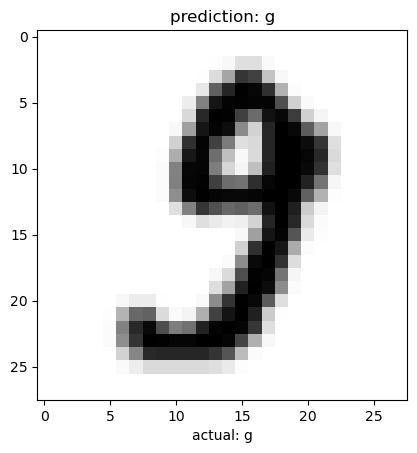

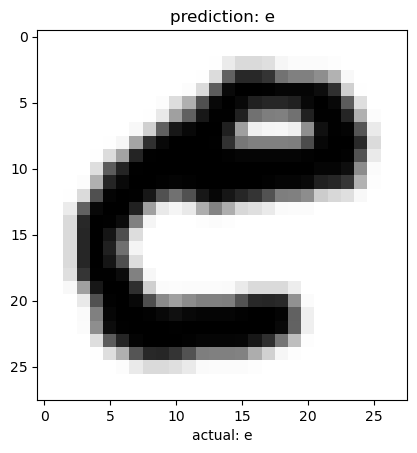

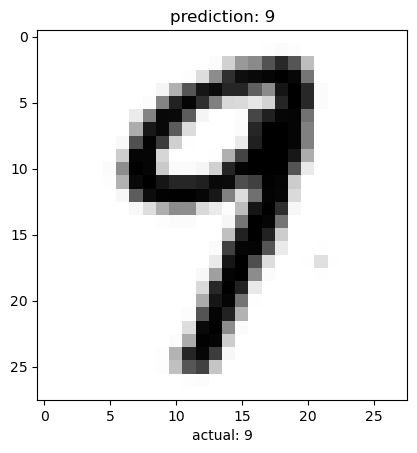

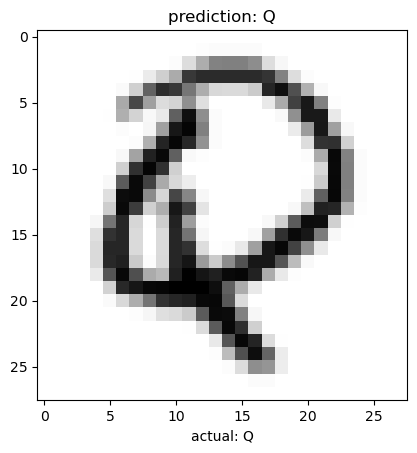

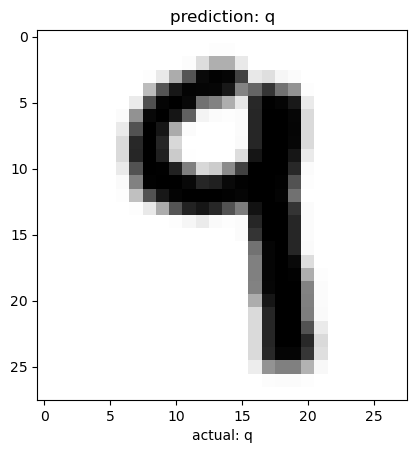

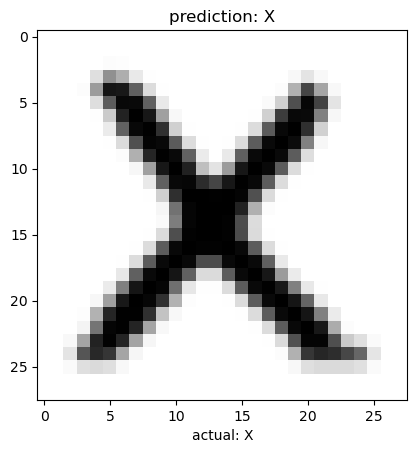

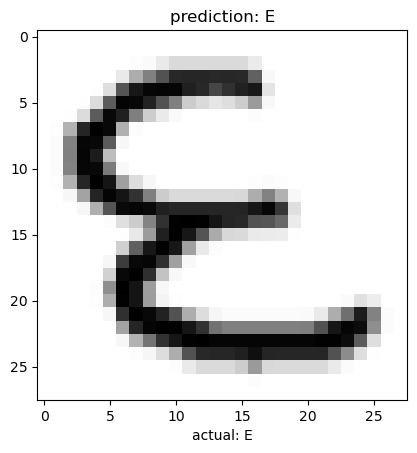

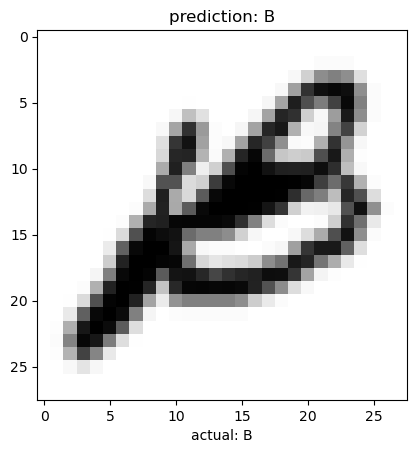

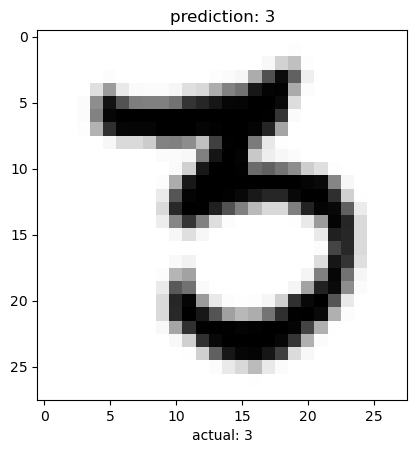

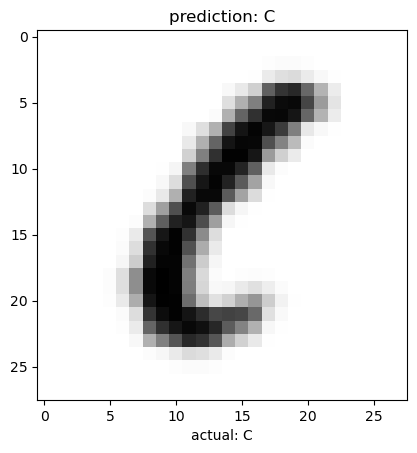

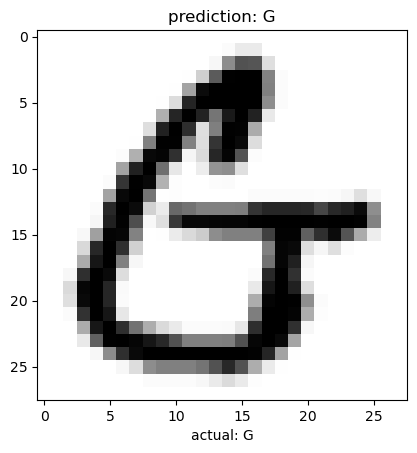

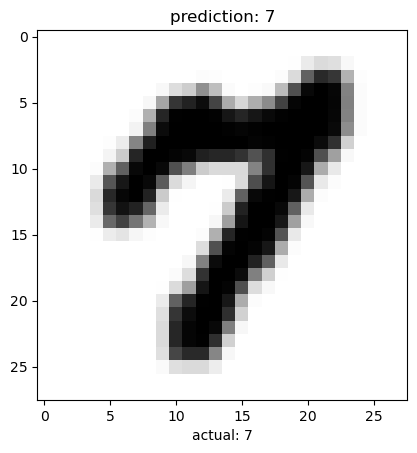

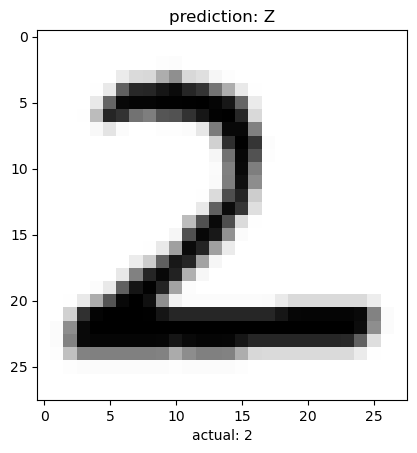

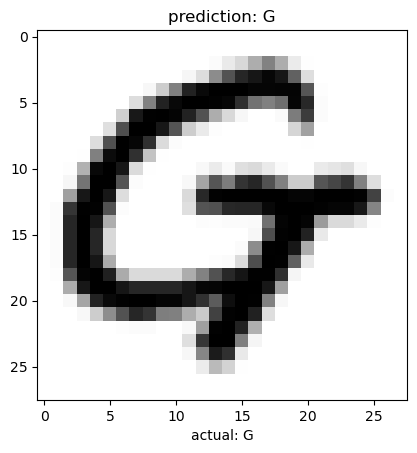

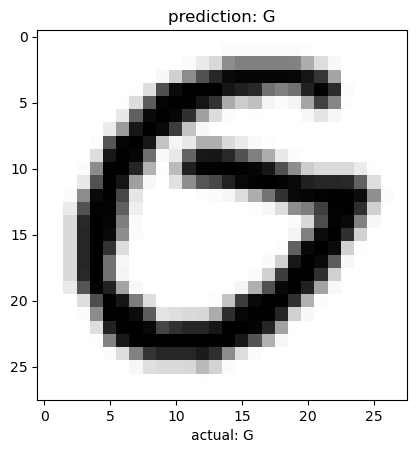

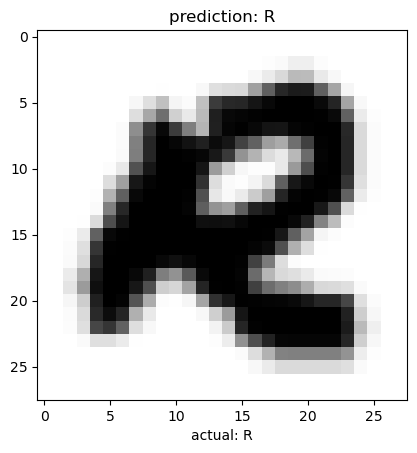

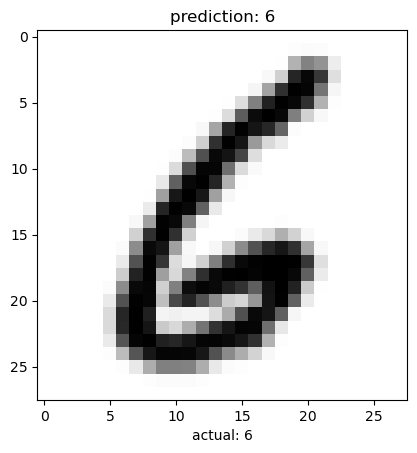

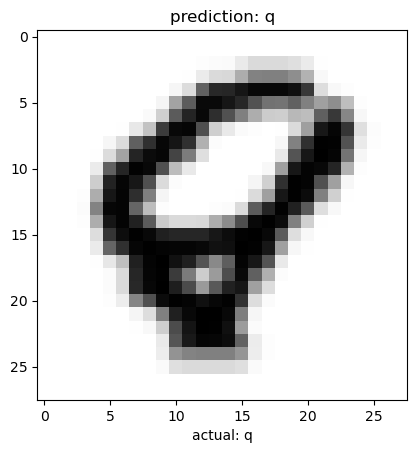

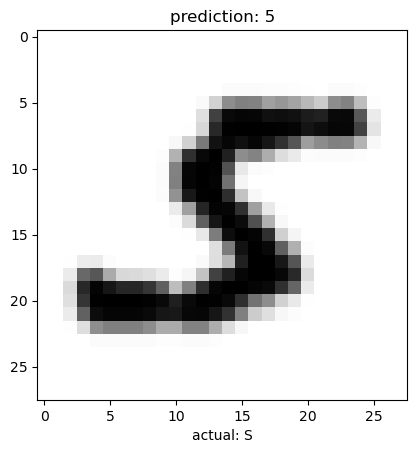

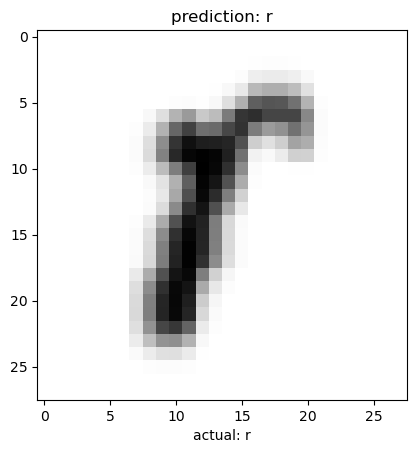

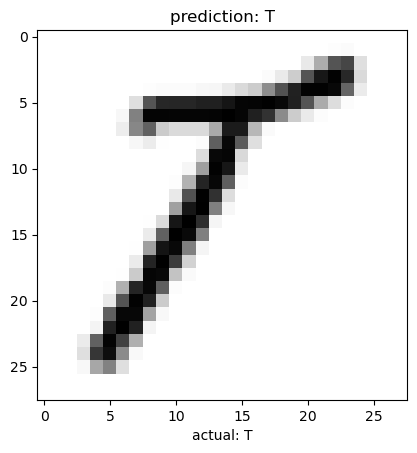

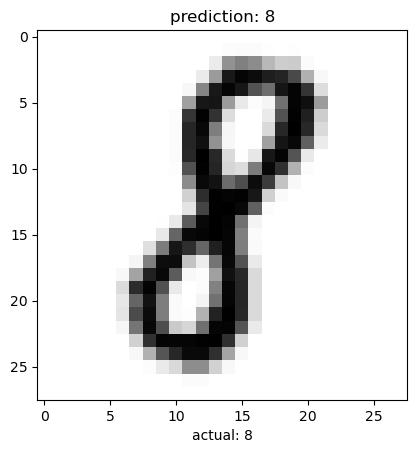

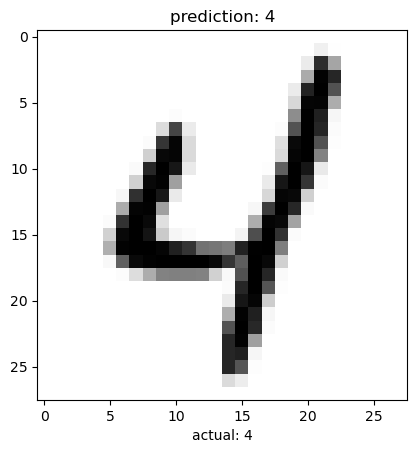

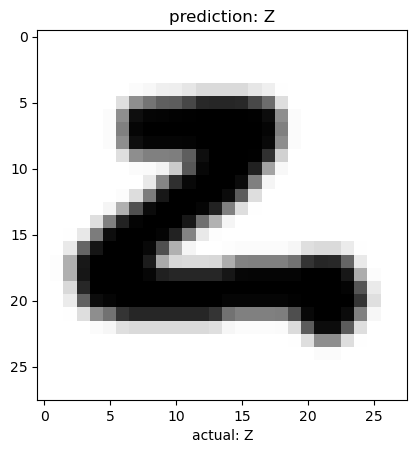

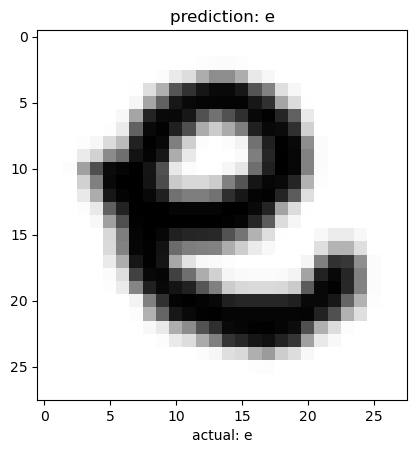

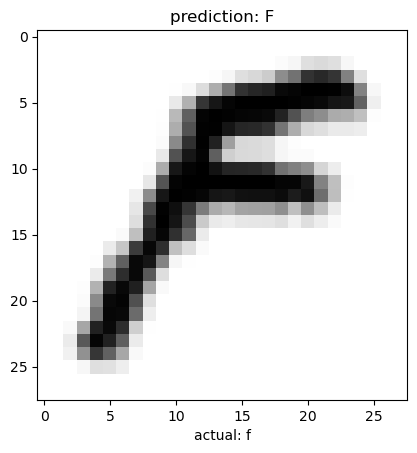

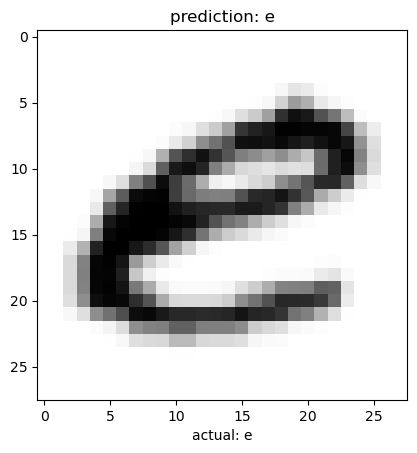

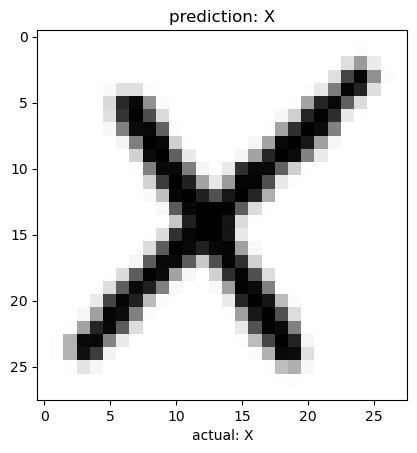

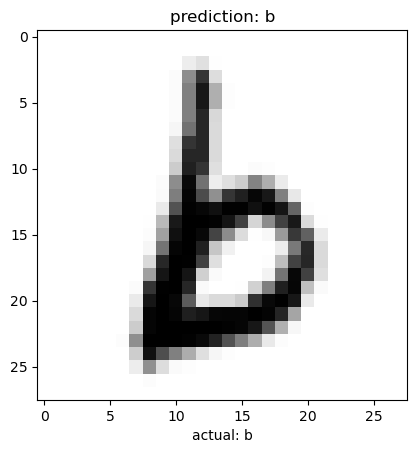

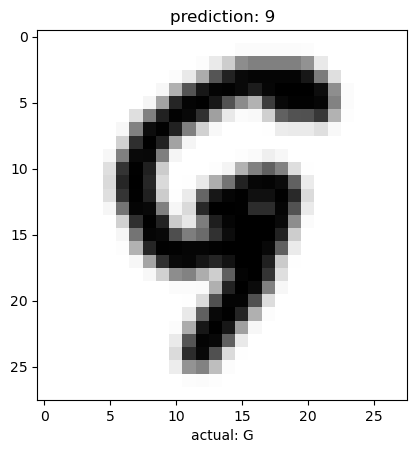

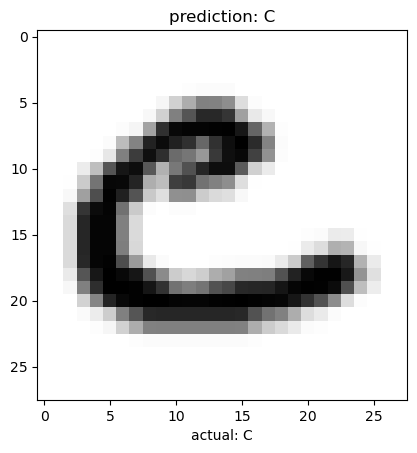

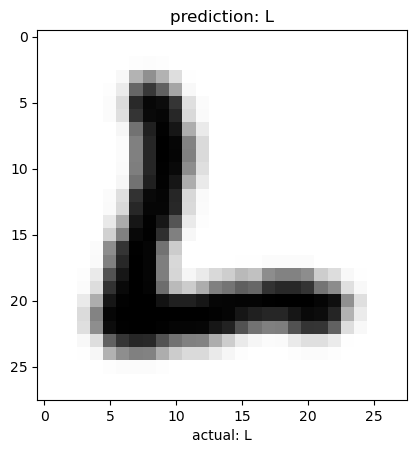

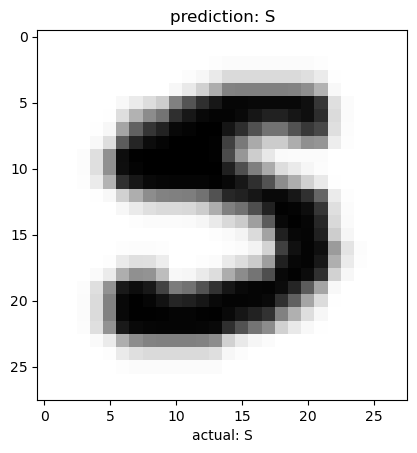

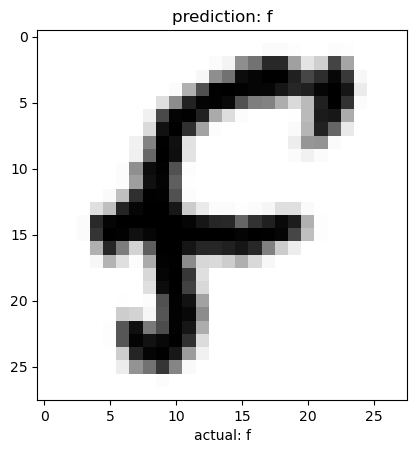

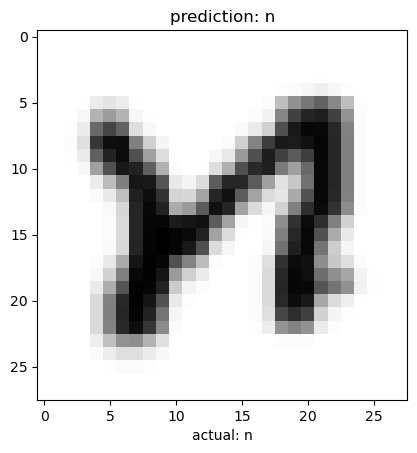

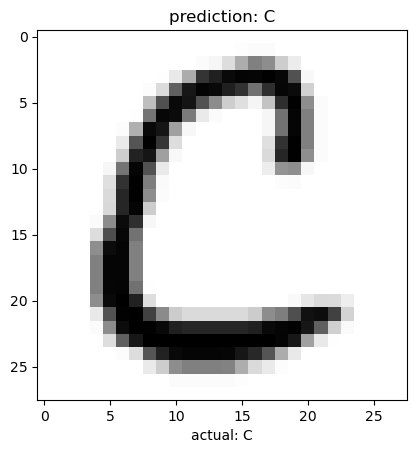

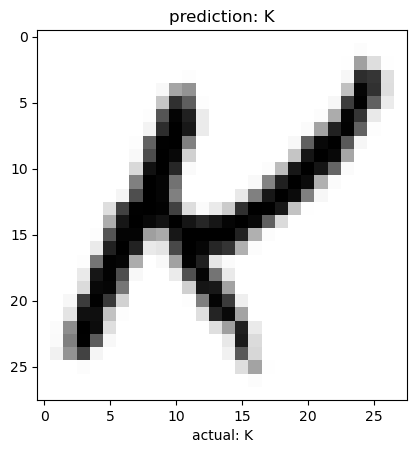

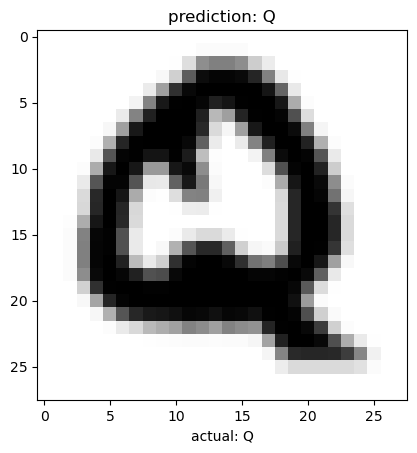

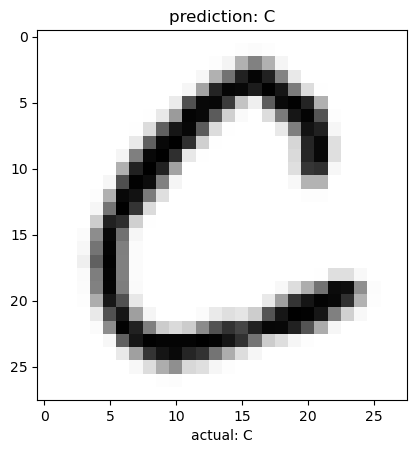

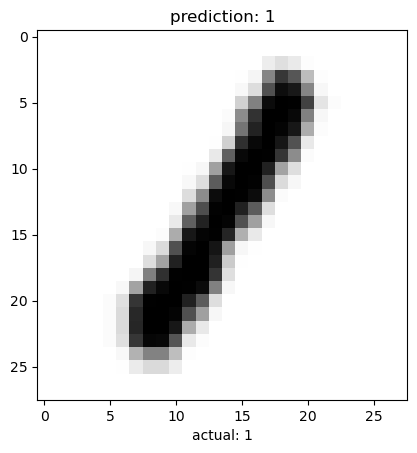

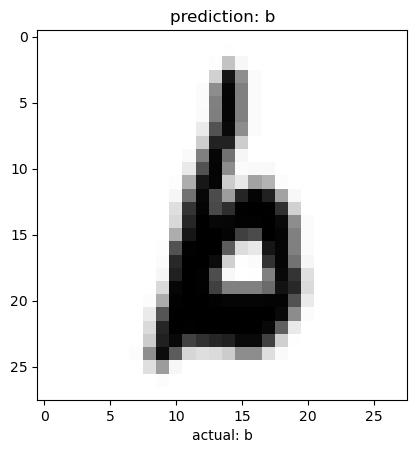

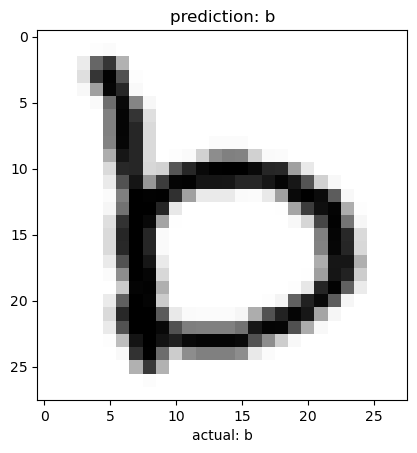

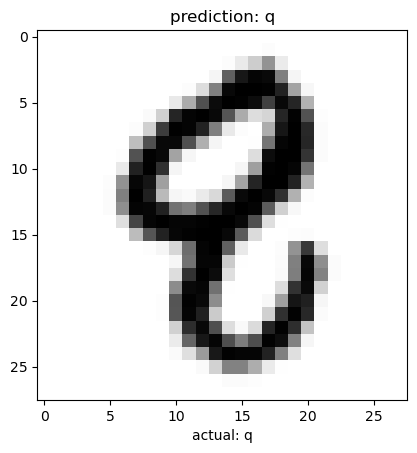

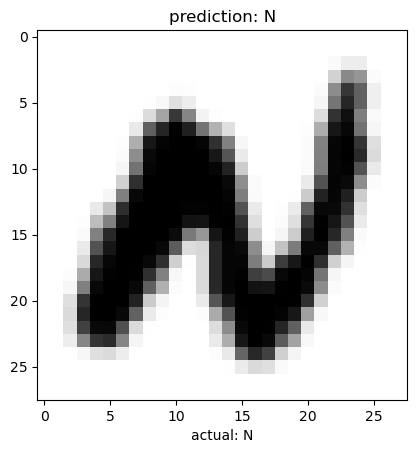

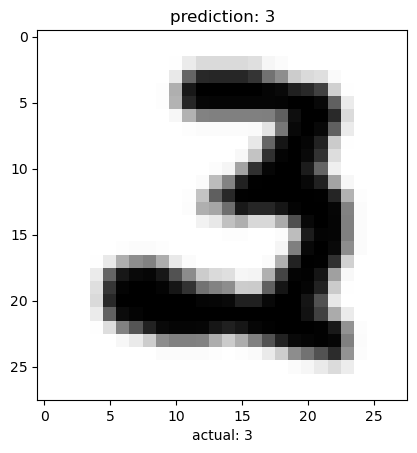

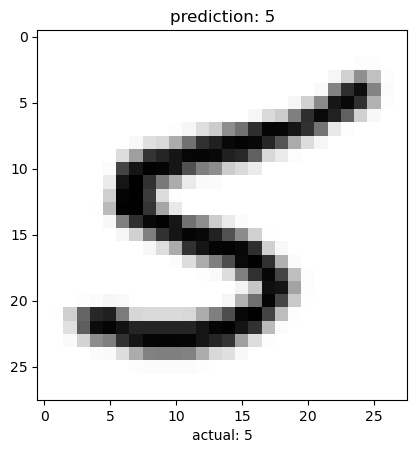

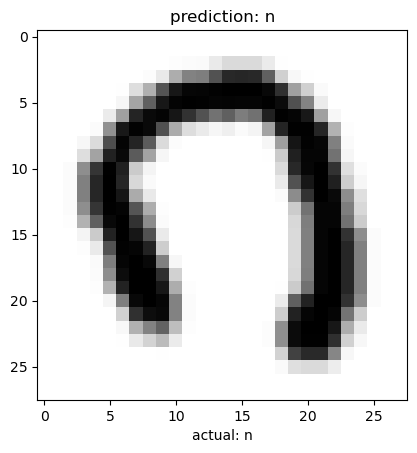

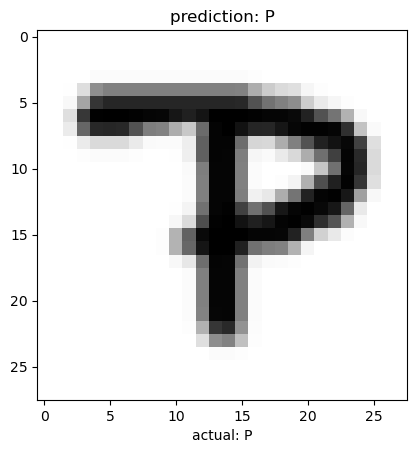

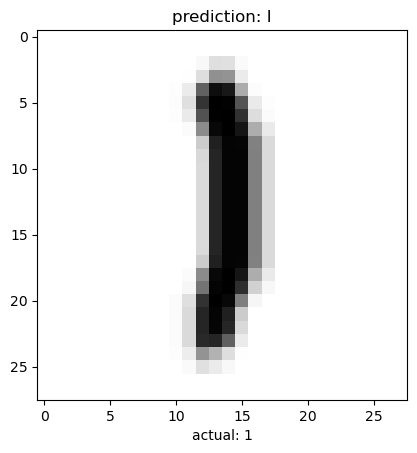

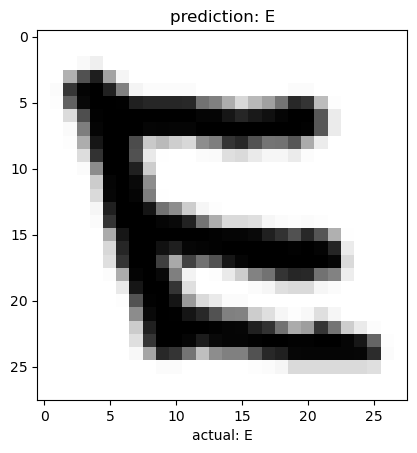

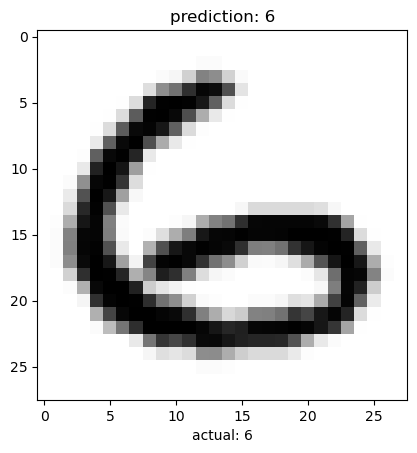

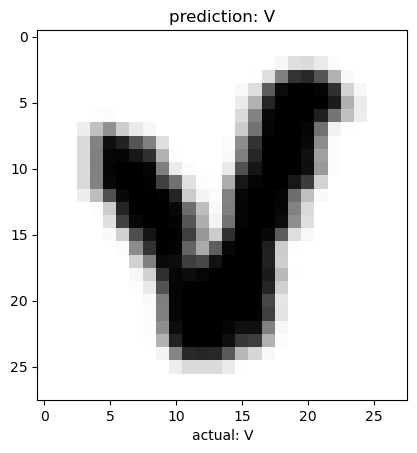

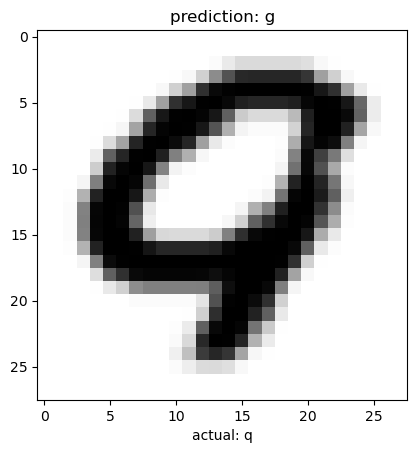

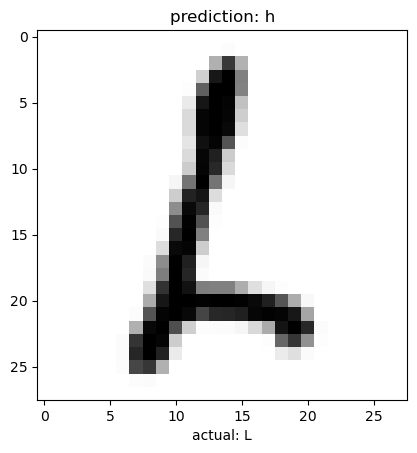

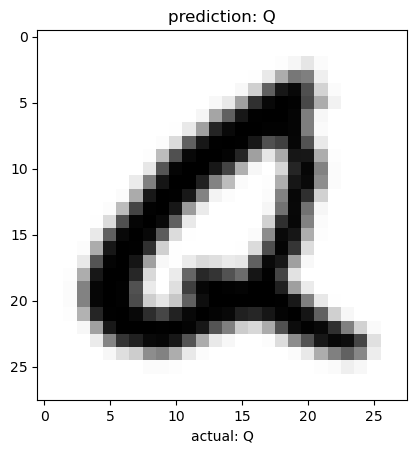

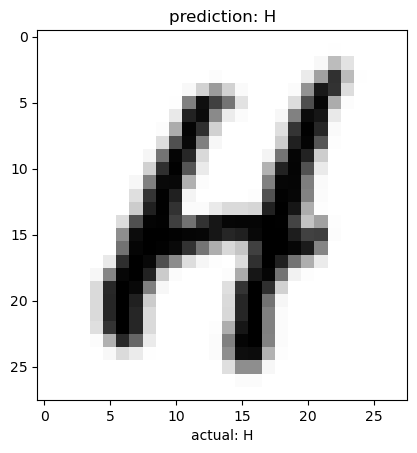

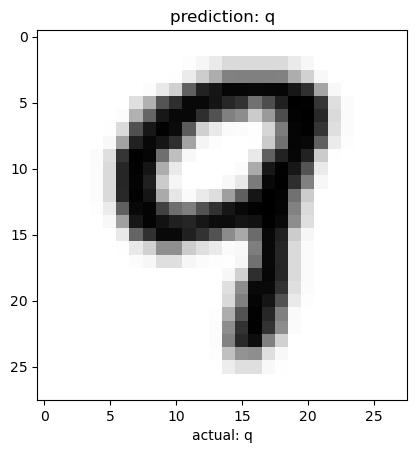

In [ ]:
for i in range(len(testdata.index)):
   # if(chr(map[np.argmax(prediction[i])])!=chr(map[ytest[i]])):
        plt.imshow(xtest[i].reshape((28, 28)), cmap=plt.cm.binary)
        plt.xlabel("actual: "+chr(map[ytest[i]]))
        plt.title("prediction: "+chr(map[np.argmax(prediction[i])]))
        plt.show()
    